# Assignment Part 1: Economy Data Visualization

In this assignment, you will be working with city-wide economic data for China from 2010 to 2019. This data includes information on population size, urbanization rate, and disposable income for various cities in China. You will use the Python libraries Numpy, Pandas, and Matplotlib to analyze and visualize this data, and gain insights into trends and patterns in the Chinese economy over the past decade. You will start by reading the data into a Pandas dataframe, and then use Numpy and Pandas to manipulate and summarize the data. You will then use Matplotlib to create plots and charts to visualize the data and uncover trends and patterns.

By completing this assignment, you will gain hands-on experience with these important tools for data analysis and visualization in Python, and develop your skills in working with real-world data.

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as npy
import seaborn as sns
from copy import deepcopy as cp

census = pd.read_csv('census.csv')
census = census.fillna(0)

# Task 1: Urbanization Analysis

In [2]:
"""
Preprocess dataframe.
"""
dataframe = pd.DataFrame(census, columns=['year', 'dum', 'urbanization_rate', 'urban_disposable_income', 'rural_disposable_income'])
dataframe

,year,dum,urbanization_rate,urban_disposable_income,rural_disposable_income
0,2010,Beijing,0.860,29072.9,13262.3
1,2011,Beijing,0.862,32903.0,14735.7
2,2012,Beijing,0.862,36468.8,16475.7
3,2013,Beijing,0.863,40321.0,18337.5
4,2014,Beijing,0.864,48531.8,18867.3
...,...,...,...,...,...
2045,2015,Chongqing,0.609,27238.8,10504.7
2046,2016,Chongqing,0.626,29610.0,11548.8
2047,2017,Chongqing,0.641,32193.2,12637.9
2048,2018,Chongqing,0.655,34889.3,13781.2


We have the urbanization_rate of several cities between 2010 and 2019.
Now, we are going to find the most `successful` city on urbanization.
For example, Beijing's urbanization_rate is 0.860 on 2010 and 0.866 on 2019.
Beijing has a 0.006 improvement.
The task is to find the city with the highest improvement.

We visualize the average urbanization_rate from 2010 to 2019.
It is promising to find that the urbanization_rate improves gradually recent years.

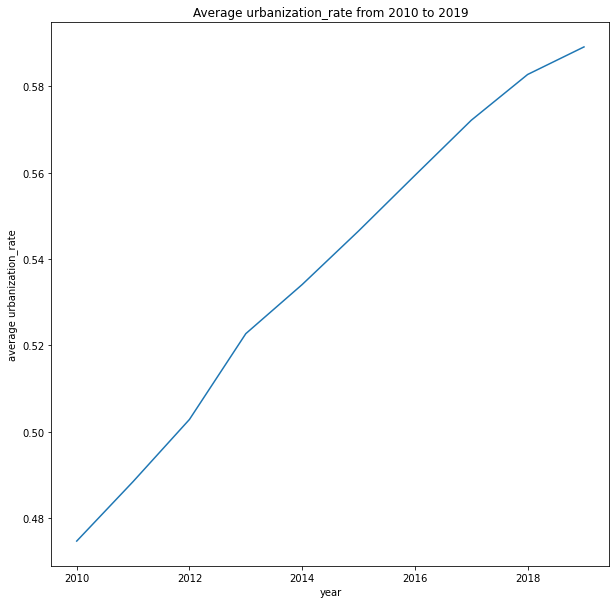

In [67]:
plt.figure(figsize=(10,10))
plt.title('Average urbanization_rate from 2010 to 2019')

# TODO: use seaborn.lineplot to plot the grneral urbanization rate
############# YOUR CODE HERE #############
year_range = list(range(2010, 2020, 1))
avg_urbanization_rate = []
for y in year_range:
    avg_urbanization_rate.append(dataframe[dataframe['year']==y]['urbanization_rate'].mean())
plotting_data = pd.DataFrame({'year': year_range, 'average urbanization_rate': avg_urbanization_rate})
sns.lineplot(data=plotting_data, x="year", y="average urbanization_rate")
del plotting_data
############# YOUR CODE HERE #############

Now, we need to collect the improvements for all the cities.
Specifically, `collected_urban_rates` is a numpy array with shape [num_cities, 2].
Each row contains urbanization rates of a city on 2010 and 2019, respectively.

In [79]:
# cities = list(set(dataframe['dum']))
# Fix wrong cities
# 202 != 2050 / 10, there are some cities with same name in phonetic transcription. Such as Tai Zhou in Zhe Jiang and Tai Zhou in Jiang Su.
# However, we have no more information to find that which cities is the real "Tai Zhou", so I use "Tai Zhou" and "Tai Zhou_" to distinguish them.
# We can check that the modify will not influence the result.
temp_frame = dataframe[dataframe['year']==2010]
cities = []
for city in list(temp_frame['dum']):
    while city in cities:
        city = city + "_"
    cities.append(city)
assert len(cities) == 2050 // 10
del temp_frame

# modify the dataframe
temp_frame = cp(dataframe)
assert id(temp_frame) != id(dataframe)
cnt = 0
for city in cities:
    for index in range(10):
        temp_frame.iloc[cnt + index, 1] = city
    cnt += 10

# TODO: Obtain `collected_urban_rates`
############# YOUR CODE HERE #############
num_cities = len(cities)
collected_urban_rates = npy.zeros((num_cities, 2))

for index, city in enumerate(cities):
    collected_urban_rates[index, 0] = temp_frame[(temp_frame.year==2010) & (temp_frame.dum==city)]['urbanization_rate']
    collected_urban_rates[index, 1] = temp_frame[(temp_frame.year==2019) & (temp_frame.dum==city)]['urbanization_rate']
del temp_frame
############# YOUR CODE HERE #############

idx = npy.argmax(collected_urban_rates[:, 1] - collected_urban_rates[:, 0])
print(f"The most successful city is {cities[idx]}, the urbanization rate improves from {collected_urban_rates[idx, 0]} to {collected_urban_rates[idx, 1]}.")

The most successful city is Zibo City, the urbanization rate improves from 0.402 to 0.72.


# Task 2: Economy Data Visualization

In this task, we are going to visualize some economy data and trends in the dataset.

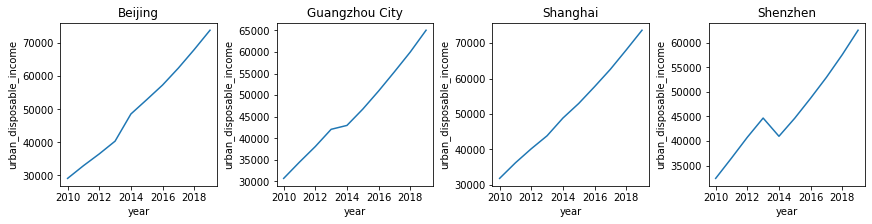

In [80]:
# TODO: plot the line plot of urban disposable income of `Beijing`, `Guangzhou City`, `Shanghai` and `Shenzhen`

############## YOUR CODE HERE ##############
temp_data = []
cities = ["Beijing", "Guangzhou City", "Shanghai", "Shenzhen"]
for city in cities:
    temp_data.append(dataframe[dataframe['dum'] == city])

# print(temp_data[0])

fig, ax =plt.subplots(1, 4, constrained_layout=True, figsize=(12, 3))
for index, data in enumerate(temp_data):
    sub_ax = sns.lineplot(x=data.year, y=data.urban_disposable_income, ax=ax[index])
    sub_ax.set_title(cities[index])
del temp_data, cities, city
############# YOUR CODE HERE #############

The Theil index is a statistic primarily used to measure economic inequality. For more information, you can refer to https://en.wikipedia.org/wiki/Theil_index
Here, let's find out the cities who has higher Theil index in 2019 than that in 2010, and then draw a bar plot of their change from 2010 to 2019.

In [ ]:
# TODO: find out the cities who has higher Theil index in 2019 than that in 2010, and then draw a bar plot of their change from 2010 to 2019.

############## YOUR CODE HERE ##############

############## YOUR CODE HERE ##############

# Task 3: Disposable income

In this task, you need to analyze average disposable income in the dataset.

First, you need to calculate the disposable income for each city. Suppose this can be calculated by:
$$ \text{disposable\_income} =\text{urban\_disposable\_income}\times \text{urbanization\_rate}+\text{rural\_disposable\_income}\times(1-\text{urbanization\_rate})$$

In [ ]:
## TODO Calculate disposable_income
############## YOUR CODE HERE ##############
############## YOUR CODE HERE ##############


Then, calculate the average disposable income and total income for each city from 2011 to 2019.

In [ ]:
## TODO Calculate average disposable_income and total_income from 2011 to 2019
############## YOUR CODE HERE ##############
############## YOUR CODE HERE ##############


Finally, regression analysis is needed to find the relationship between the disposable_income and total_income.
For that, use seaborn.regplot to regress  disposable_income and total_income.

In [ ]:
## TODO Draw the fitted regression curve and scatter points.
############## YOUR CODE HERE ##############
############## YOUR CODE HERE ##############
